## Data Assessing

Original dataset contains 84853 loans with demographic and social media variables on each loan 

In [1]:
# import all packages and libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')


%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('p2pdatasocial2.csv')

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           84853 non-null  int64  
 1   ListingNumber        84853 non-null  int64  
 2   LoanOriginalAmount   84853 non-null  int64  
 3   StatedMonthlyIncome  84853 non-null  float64
 4   Term                 84853 non-null  int64  
 5   EmploymentStatus     84853 non-null  object 
 6   DebtToIncomeRatio    77557 non-null  float64
 7   MonthlyLoanPayment   84853 non-null  float64
 8   IsBorrowerHomeowner  84853 non-null  bool   
 9   SocialMediaAccess    84853 non-null  int64  
 10  Friends              53811 non-null  float64
 11  postthismonth        53811 non-null  float64
 12  Score                84853 non-null  float64
dtypes: bool(1), float64(6), int64(5), object(1)
memory usage: 7.8+ MB


## Exploratory Data Analysis

In [4]:
loan.describe()

,Unnamed: 0,ListingNumber,LoanOriginalAmount,StatedMonthlyIncome,Term,DebtToIncomeRatio,MonthlyLoanPayment,SocialMediaAccess,Friends,postthismonth,Score
count,84853.000000,8.485300e+04,84853.000000,8.485300e+04,84853.000000,77557.000000,84853.000000,84853.000000,53811.000000,53811.000000,84853.000000
mean,56958.246850,7.738749e+05,9083.440515,5.931175e+03,42.486135,0.258752,291.930720,0.634167,384.560815,8.875286,5.950067
std,32885.220638,2.363387e+05,6287.860058,8.239944e+03,11.640346,0.318326,186.678314,0.481666,260.212022,5.336598,2.376501
min,1.000000,4.162750e+05,1000.000000,0.000000e+00,12.000000,0.000000,0.000000,0.000000,44.000000,6.000000,1.000000
25%,28507.000000,5.580860e+05,4000.000000,3.434000e+03,36.000000,0.150000,157.330000,0.000000,132.000000,6.000000,4.000000
50%,56960.000000,7.392460e+05,7500.000000,5.000000e+03,36.000000,0.220000,251.940000,1.000000,297.000000,6.000000,6.000000
75%,85420.000000,9.794360e+05,13500.000000,7.083333e+03,60.000000,0.320000,388.350000,1.000000,499.000000,8.000000,8.000000
max,113936.000000,1.255725e+06,35000.000000,1.750003e+06,60.000000,10.010000,2251.510000,1.000000,1014.000000,24.000000,11.000000


## Input / Independent variables 
1. SocialMediaAccess : It is a dummy variable, which is 1 if the borrower disclosed his microblog account on the p2p lending platform, otherwise is 0.
2. Friends: The number of followers can be regarded as a proxy for the scope of borrowers’ social network
3. postthismonth : We use the number of microblogs that the borrower has posted on his microblog page as a measurement of his engagement in the social media site,

## Control Variables 

Borrower’s demographic characteristics. This set of control variables includes borrowers’ loan amount, monthly income, loan to income ratio, monthlyloan payment, if the borrower is a homeowner etc.


## Output Variable 
Our main variable of interest is the Score which is assigned to each of the loan applicants based, It is between 1-11 where 0 being a bad borrower and 11 meaning good borrower

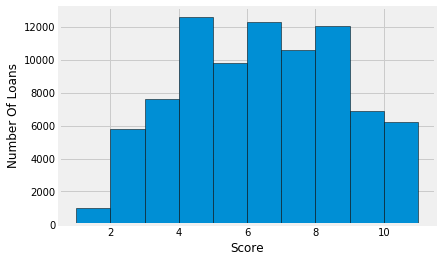

In [5]:
# analyzing the lending score 

plt.hist(data = loan, x = 'Score',histtype = 'bar',ec = 'black');
plt.xlabel('Score');
plt.ylabel('Number Of Loans');


# Univariate Exploration 

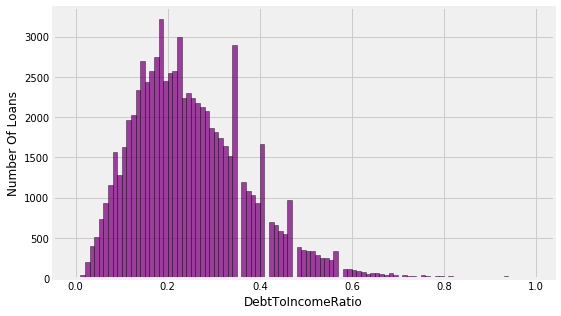

In [6]:
# distribution of DebtToIncomeRatio 
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins,histtype = 'bar',ec = 'black',color = 'purple',alpha = 0.75);
plt.xlabel('DebtToIncomeRatio');
plt.ylabel('Number Of Loans');

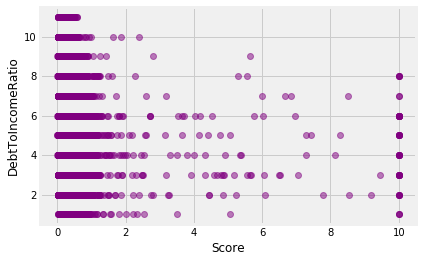

In [7]:
plt.plot(loan['DebtToIncomeRatio'],loan['Score'],'bo',color = 'purple', alpha = 0.5);
plt.xlabel('Score');
plt.ylabel('DebtToIncomeRatio');


C:\foo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


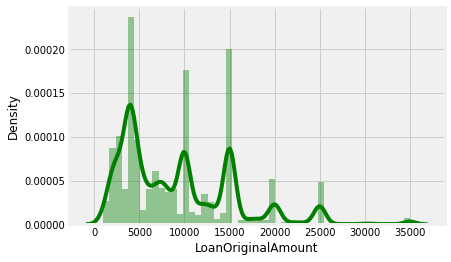

In [8]:
sns.distplot(loan['LoanOriginalAmount'],color = 'green');

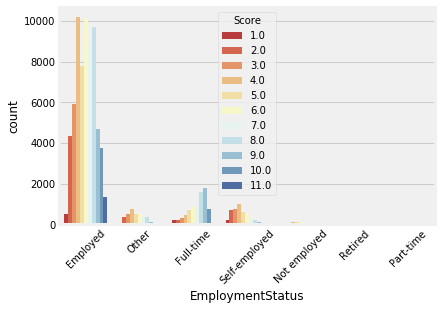

In [9]:
sns.countplot(data = loan, x = 'EmploymentStatus', hue = 'Score', palette = 'RdYlBu');
plt.xticks(rotation=45);

In [10]:
#mapping employement status
Employment_mapping = {"Employed": 1, "Full-Time": 2, "Self-Employed": 3, "Retired": 4, "Not-Employed": 5, "Other": 6}

loan['EmploymentStatus'] = loan['EmploymentStatus'].map(Employment_mapping)

## Bivariate Exploration

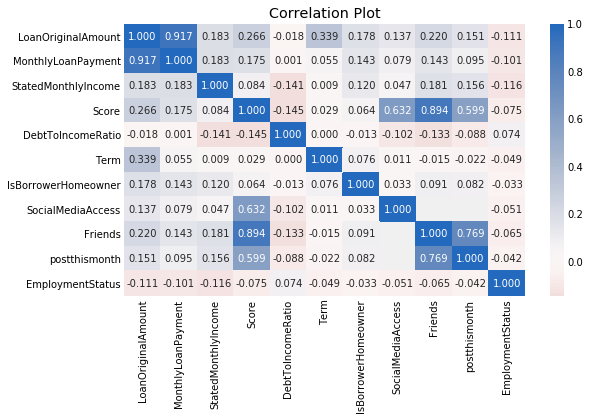

In [11]:
num_vars = ['LoanOriginalAmount', 'MonthlyLoanPayment',
            'StatedMonthlyIncome','Score','DebtToIncomeRatio','Term',
           'IsBorrowerHomeowner','SocialMediaAccess','Friends','postthismonth','EmploymentStatus']
plt.figure(figsize = [8, 5])
sns.heatmap(loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

In [34]:
# loan.drop(['Score','Unnamed: 0','ListingNumber'], axis = 1)

In [23]:
#dropping nan values
loan = loan.dropna()

In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(loan.drop(['Score','Unnamed: 0','ListingNumber'], axis = 1), 
                                                    loan['Score'], test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35347, 10) (35347,)
(8837, 10) (8837,)


In [26]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [27]:
predictions[0:5]


array([8.94628161, 8.33592244, 9.82720576, 8.25493201, 6.34245061])

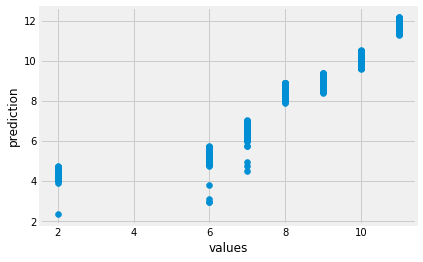

In [28]:
plt.scatter(y_test, predictions)
plt.xlabel('values');
plt.ylabel('prediction');

In [29]:
model.score(X_test, y_test)

0.8216109629683664

In [33]:
# sns.lmplot('Friends', 'Score', data = loan)


In [61]:
y_data.head()

,LoanOriginalAmount,StatedMonthlyIncome,Term,EmploymentStatus,DebtToIncomeRatio,MonthlyLoanPayment,IsBorrowerHomeowner,SocialMediaAccess,Friends,postthismonth
0,0,5000,36,1,0,0,False,1,241,2


In [62]:
y_data = pd.read_csv('y_data.csv',index_col = False)

In [63]:
score_y = lm.predict(y_data)

In [64]:
score_y

array([6.24264355])

In [68]:
# m_data = pd.read_csv('m_data.csv',index_col = False)

In [71]:
# saving model as a pickle
import pickle
pickle.dump(lm,open("trustandaffluenceprediction.sav", "wb"))
